In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as spp
import scipy.stats as stats
import seaborn as sns
import os
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.patches as patches


sns.set_style('ticks')
sns.set_palette('deep')

# sns.set_theme( palette="deep", style="ticks")


curpath = Path("/home/preclineu/stijdboe/Projects/MasterThesis")

projpath = curpath
print("Project dir:", curpath)

latexpath = projpath / 'Latex' / 'Thesis'
print("Latex is in: ",latexpath)

imgspath = latexpath / 'imgs'
print("Images in: ", imgspath)

# plt.style.use('ggplot')
plt.rc('font', size=16)         # default fontsize 
plt.rc('axes', titlesize=16)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)   # fontsize of the tick labels
plt.rc('ytick', labelsize=15)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('lines',linewidth=2)
plt.rc('axes',grid=True)
plt.rc('grid',linestyle=":")
plt.rc('grid',linewidth=1)
plt.rc('grid',alpha=0.7)


dpi = 300

Project dir: /home/preclineu/stijdboe/Projects/MasterThesis
Latex is in:  /home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis
Images in:  /home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs


In [41]:
def S(x, e, d):
    return np.sinh(d*np.arcsinh(x)-e)

def S_inv(x, e, d):
    return np.sinh((np.arcsinh(x)+e)/d)

def C(x, e, d):
    return np.cosh(d*np.arcsinh(x)-e)

    
def K(p, x):
    return spp.kv(p, x)

def K(p, x):
    return np.array(spp.kv(p, x))

def P(q):
    """
    The P function as given in Jones et al.
    :param q:
    :return:
    """
    frac = np.exp(1 / 4) / np.sqrt(8 * np.pi)
    K1 = K((q + 1) / 2, 1 / 4)
    K2 = K((q - 1) / 2, 1 / 4)
    a = (K1 + K2) * frac
    return a

def m(epsilon, delta, r):
    """
    The r'th uncentered moment. Given by Jones et al.
    """
    frac1 = 1 / np.power(2, r)
    acc = 0
    for i in range(r + 1):
        combs = spp.comb(r, i)
        flip = np.power(-1, i)
        ex = np.exp((r - 2 * i) * epsilon / delta)
        p = P((r - 2 * i) / delta)
        acc += combs * flip * ex * p
    return frac1 * acc

def m_centered(epsilon, delta, r):
    mean = m(epsilon,delta,1)
    acc = 0
    for j in range(r+1):
        term1 = spp.comb(r,j)
        term2 = (-1)**(r-j)
        term3 = m(epsilon, delta, j)
        term4 = mean**(r-j)
        acc+= term1*term2*term3*term4
    return acc

def f(x, e, d):
    frac1 = 1/np.sqrt(2*np.pi)
    frac2 = d*C(x,e,d)/np.sqrt(1+x**2)
    exp = np.exp(-S(x,e,d)**2/2)
    return frac1*frac2*exp

def fo(x, m, s, e, d):
    return f((x-m)/s, e,d )/s

def fb(x, mu, s, e, d):
    mean = m(e,d,1)
    std = np.sqrt(m(e,d,2)-mean**2)
    return f(((x*std + mean)-mu)/s, e, d)*std/s
    

def sample_SHASH(N, e, d):
    sam = np.random.randn(N)
    return S_inv(sam, e, d)

def sample_SHASHo(N, mu, s, e, d):
    sam = np.random.randn(N)
    X = S_inv(sam, e, d)
    X = X*s + mu
    return X

def sample_SHASHb(N, mu, s, e, d):
    mean = m(e, d, 1)
    std = np.sqrt(m(e, d, 2) - mean**2)
    sam = np.random.randn(N)
    X = S_inv(sam, e, d)
    X = (X-mean)/std
    X = X*s + mu
    return X

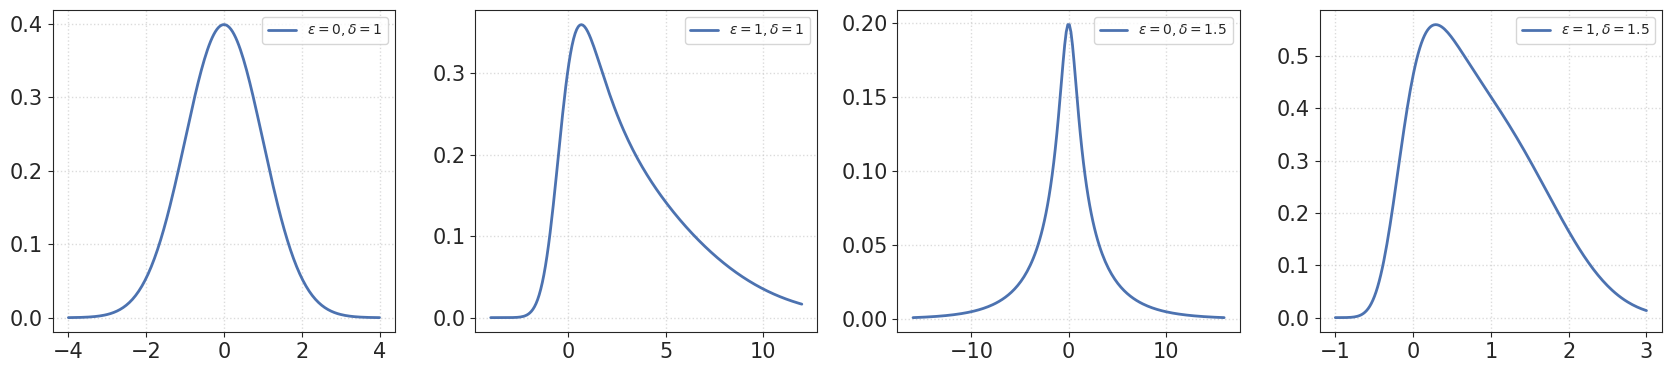

In [42]:
fig, ax = plt.subplots(1,4,figsize=(17,4))
ax = ax.flatten()

x = np.linspace(-4,4,200)
ax[0].plot(x, f(x, 0,1),label='$\epsilon=0, \delta=1$')
ax[1].plot(x*2+4, f(x+2, 1,1),label='$\epsilon=1, \delta=1$')
ax[2].plot(x*4, f(x*4, 0,0.5),label='$\epsilon=0, \delta=1.5$')
ax[3].plot(x/2 +1, f(x/2 +1, 1,1.5),label='$\epsilon=1, \delta=1.5$')


for a in ax:
    a.legend(fontsize=10)
# plt.show()
plt.tight_layout()
plt.savefig(imgspath / 'some_shashes.png',dpi=dpi)


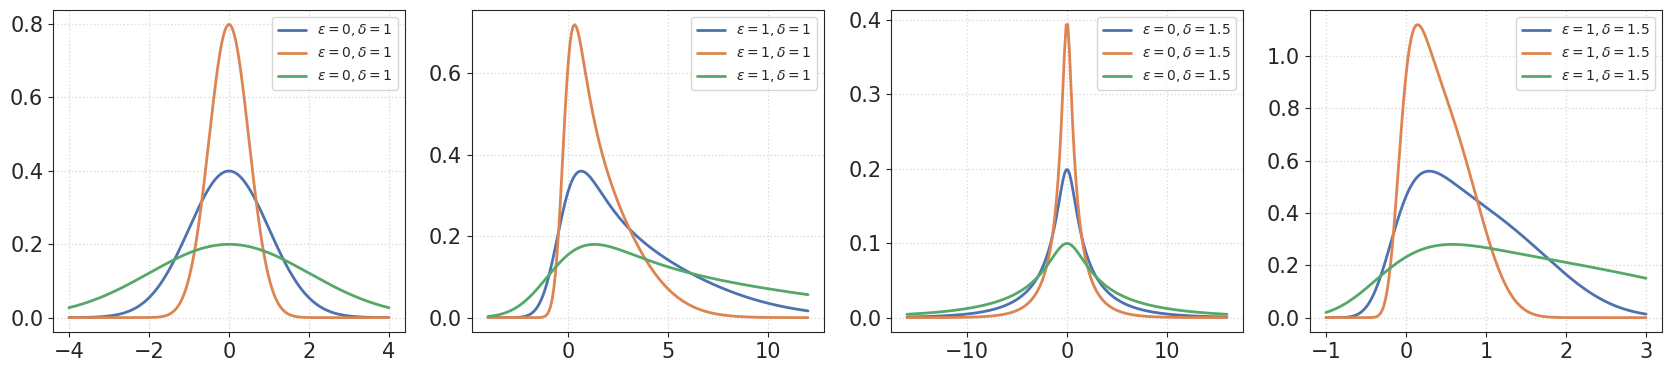

In [43]:
fig, ax = plt.subplots(1,4,figsize=(17,4))
ax = ax.flatten()

x = np.linspace(-4,4,200)
sigmas = [0.5, 2]
mus = [-2, 0]
mu = 0

    
ax[0].plot(x, fo(x,0, 1, 0,1),label='$\epsilon=0, \delta=1$')
ax[1].plot(x*2+4, fo(x+2, 0, 1, 1,1),label='$\epsilon=1, \delta=1$')
ax[2].plot(x*4, fo(x*4, 0, 1, 0,0.5),label='$\epsilon=0, \delta=1.5$')
ax[3].plot(x/2 +1, fo(x/2 +1, 0, 1, 1,1.5),label='$\epsilon=1, \delta=1.5$')
for sigma in sigmas:
    
    ax[0].plot(x, fo(x,mu, sigma, 0,1),label='$\epsilon=0, \delta=1$')
    ax[1].plot(x*2+4, fo(x+2, mu, sigma, 1,1),label='$\epsilon=1, \delta=1$')
    ax[2].plot(x*4, fo(x*4, mu, sigma, 0,0.5),label='$\epsilon=0, \delta=1.5$')
    ax[3].plot(x/2 +1, fo(x/2 +1, mu, sigma, 1,1.5),label='$\epsilon=1, \delta=1.5$')


for a in ax:
    a.legend(fontsize=10)
# plt.show()
plt.tight_layout()
plt.savefig(imgspath / 'some_shashes_scaled.pdf')


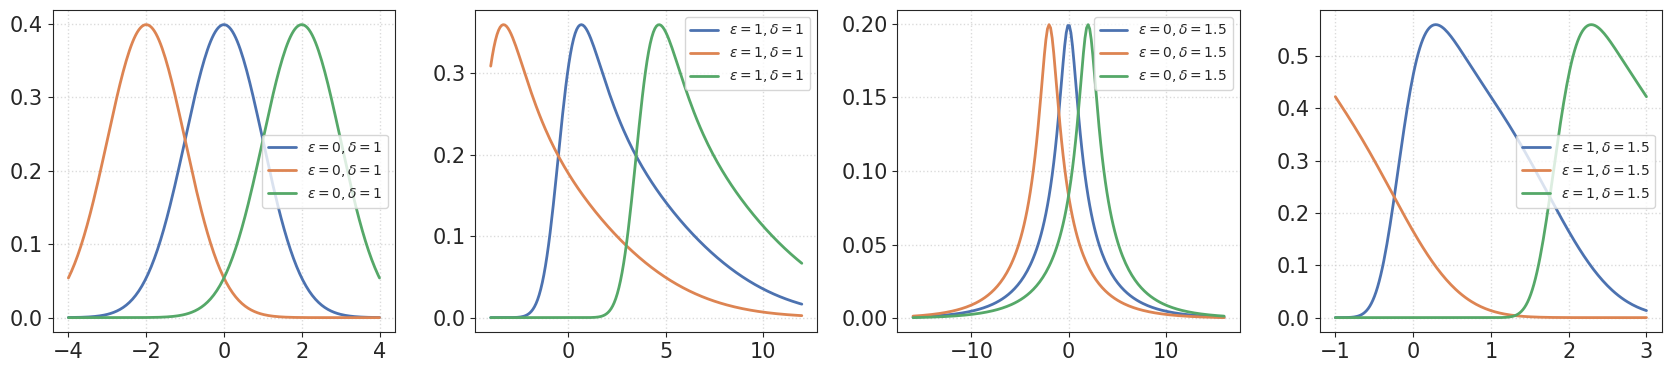

In [44]:
fig, ax = plt.subplots(1,4,figsize=(17,4))
ax = ax.flatten()

x = np.linspace(-4,4,200)
mus = [-2, 2]
    
ax[0].plot(x, fo(x,0, 1, 0,1),label='$\epsilon=0, \delta=1$')
ax[1].plot(x*2+4, fo(x+2, 0, 1, 1,1),label='$\epsilon=1, \delta=1$')
ax[2].plot(x*4, fo(x*4, 0, 1, 0,0.5),label='$\epsilon=0, \delta=1.5$')
ax[3].plot(x/2 +1, fo(x/2 +1, 0, 1, 1,1.5),label='$\epsilon=1, \delta=1.5$')
sigma = 1
for mu in mus:
    
    ax[0].plot(x, fo(x,mu, sigma, 0,1),label='$\epsilon=0, \delta=1$')
    ax[1].plot(x*2+4, fo(x+2, mu, sigma, 1,1),label='$\epsilon=1, \delta=1$')
    ax[2].plot(x*4, fo(x*4, mu, sigma, 0,0.5),label='$\epsilon=0, \delta=1.5$')
    ax[3].plot(x/2 +1, fo(x/2 +1, mu, sigma, 1,1.5),label='$\epsilon=1, \delta=1.5$')


for a in ax:
    a.legend(fontsize=10)
# plt.show()
plt.tight_layout()
plt.savefig(imgspath / 'some_shashes_shifted.pdf')


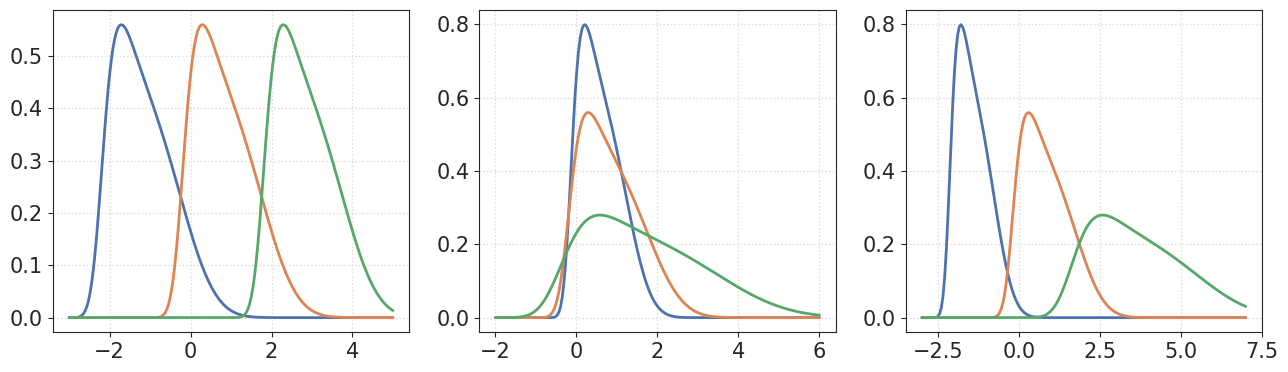

In [45]:
x = np.linspace(-4,4,200)
fig, ax = plt.subplots(1, 3, figsize=(13,4))
for i in [-2, 0, 2]:
    ax[0].plot(x+1, fo(x+1, i, 1, 1, 1.5))
for i in [0.7, 1, 2]:
    ax[1].plot(x+2, fo(x+2, 0, i, 1, 1.5))
x = np.linspace(-3, 7, 200)
for i,j in zip([-2,0,2],[0.7,1,2]):
    ax[2].plot(x, fo(x, i,j,1,1.5))
plt.tight_layout()
plt.savefig(imgspath / 'shifted_and_scaled_shashes.pdf')


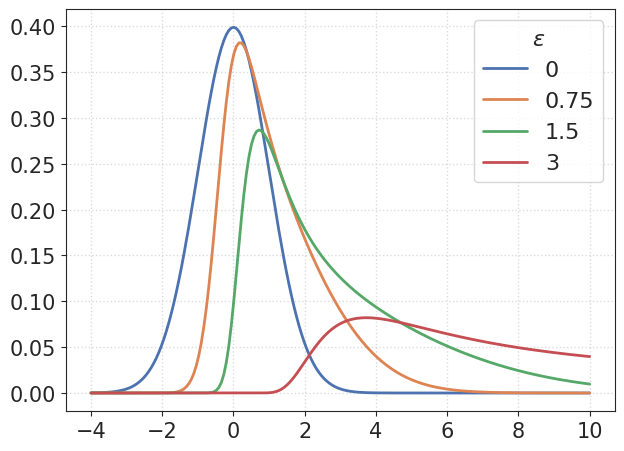

In [46]:
x = np.linspace(-4,10,200)
for i in [0, 0.75, 1.5, 3]:
    plt.plot(x, fo(x, 0, 1, i, 1), label  = i)
plt.legend(title='$\epsilon$')
plt.tight_layout()
plt.savefig(imgspath / 'other_effect_of_epsilon.png',dpi=dpi)


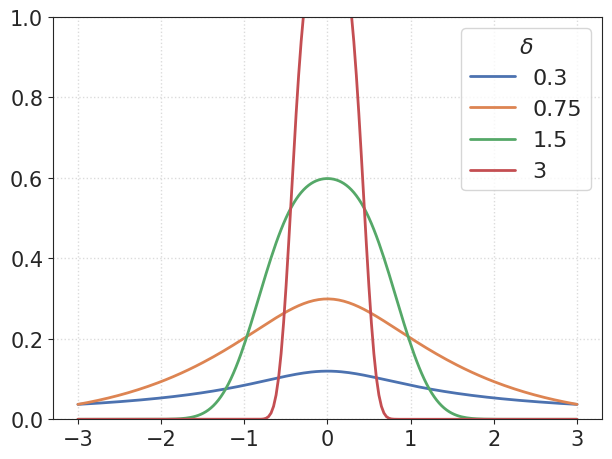

In [47]:
x = np.linspace(-3,3,200)
for i in [0.3, 0.75, 1.5, 3]:
    plt.plot(x, fo(x, 0, 1, 0, i), label  = i)
plt.legend(title='$\delta$')
plt.tight_layout()
plt.ylim(0,1)
plt.savefig(imgspath / 'other_effect_of_delta.png',dpi=dpi)

In [48]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

In [49]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

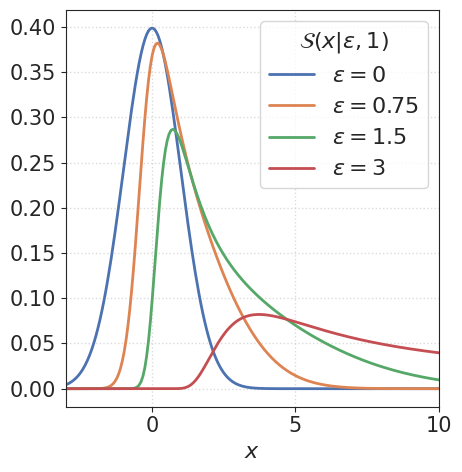

In [50]:
# Make plot of epsilon
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-3,10,200)
padwith = 5

for i in [0, 0.75, 1.5, 3]:
    ax.plot(ran, fo(ran, 0 ,1, i,1), label=f"$\epsilon={i}$",linewidth=2)
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# ax.set_yticks([],[])

leg = plt.legend(title="$\mathcal{S}(x|\epsilon, 1)$")
plt.xlim(-3,10)
plt.xlabel('$x$')
# plt.ylabel('$\mathcal{S}(x|\epsilon, 1)$')
# plt.grid('True')
plt.tight_layout()
plt.savefig(imgspath / 'effect-of-epsilon.pdf',bbox_inches='tight')



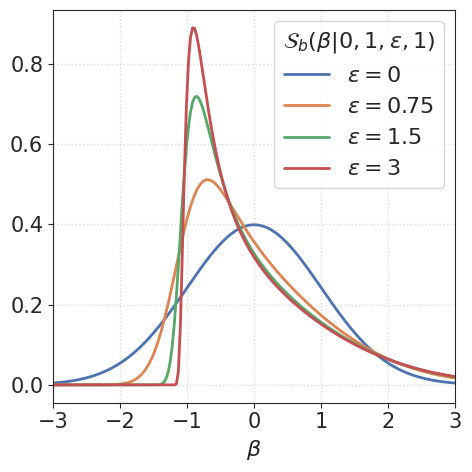

In [52]:
# Make plot of epsilon
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-3,3,200)
padwith = 5
for i in [0,0.75, 1.5, 3]:
    ax.plot(ran, fb(ran, 0 ,1, i,1), label=f"$\epsilon={i}$")
leg = plt.legend(title='$\mathcal{S}_b(\\beta|0,1,\epsilon, 1)$')
# ax.set_yticks([],[])
plt.xlim(-3,3)
plt.xlabel('$\\beta$')
# plt.ylabel()
plt.tight_layout()
plt.savefig(imgspath / 'effect-of-epsilon_centered.pdf',bbox_inches='tight')



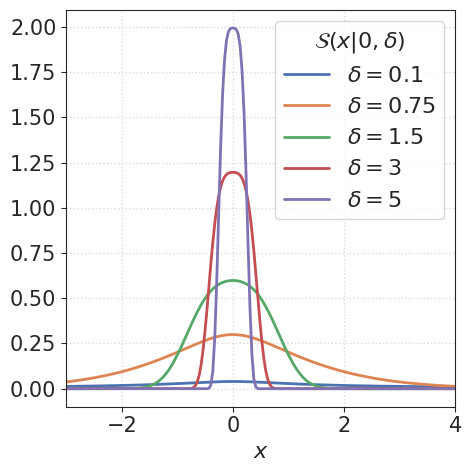

In [31]:
# Make plot of delta
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-3,4,200)
for i in [0.1,0.75, 1.5, 3, 5]:
    ax.plot(ran, fo(ran, 0 ,1, 0,i), label=f"$\delta={i}$")
plt.legend(title='$\mathcal{S}(x|0, \delta)$')
# ax.set_yticks([],[])
plt.xlim(-3,4)
plt.xlabel('$x$')
plt.tight_layout()
plt.savefig(imgspath / 'effect-of-delta.pdf',bbox_inches='tight')



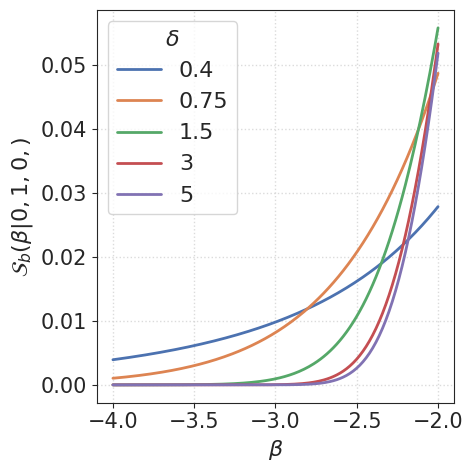

In [53]:
# Make plot of delta
fig = plt.figure(figsize=(5,5))
ran = np.linspace(-4, -2,200)
for i in [0.4, 0.75, 1.5, 3, 5]:
    plt.plot(ran, fb(ran, 0 ,1, 0, i), label=i)
plt.legend(title="$\delta$")
plt.xlabel('$\\beta$')
plt.ylabel('$\mathcal{S}_b(\\beta|0,1,0, )$')
plt.tight_layout()
plt.savefig(imgspath / 'effect-of-delta_centered_detail.png',dpi=dpi)


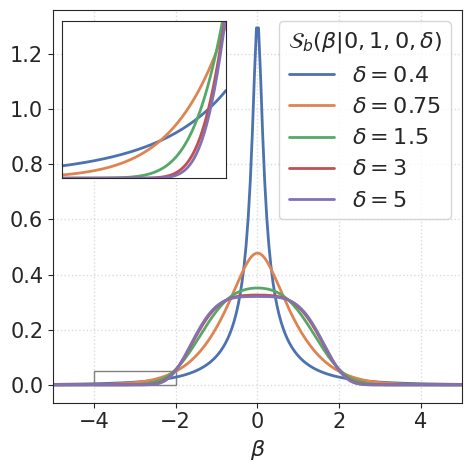

In [54]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
# Make plot of epsilon
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-5,5,200)
deltas =  [0.4, 0.75, 1.5, 3, 5]
for i in deltas:
    plt.plot(ran, fb(ran, 0 ,1, 0, i), label=f"$\delta={i}$")
plt.legend(title='$\mathcal{S}_b(\\beta|0,1,0,\delta )$')
plt.xlabel('$\\beta$')
plt.xlim(-5,5)
# ax.set_frame_on(False)
# ax.set_yticks([],[])

# plt.ylabel()
plt.tight_layout()
inax = inset_axes(ax,
                    width="100%", # width = 30% of parent_bbox
                    height="100%", # height : 1 inch
                     bbox_to_anchor=(0.05,0.6, 0.4 ,0.4), bbox_transform=ax.transAxes)

# Make plot of epsilon
ran = np.linspace(-4, -2,200)
for i in deltas:
    inax.plot(ran, fb(ran, 0 ,1, 0, i))
inax.set_ylim(0,0.05)
inax.set_xlim(-4,-2)
inax.set_xticks([])
inax.set_yticks([])
rect = patches.Rectangle((-4,0), 2, 0.05, linewidth=1, edgecolor='gray', facecolor='none')
ax.add_patch(rect)


plt.savefig(imgspath / 'effect-of-delta_centered.pdf',bbox_inches='tight')

# plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

/scratch/stijdboe/48913912.dccn-l029.dccn.nl/ipykernel_26146/1197113470.py:57: RuntimeWarning: overflow encountered in square
  exp = np.exp(-S(x,e,d)**2/2)


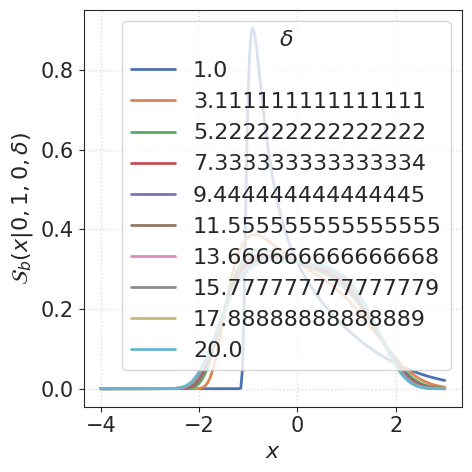

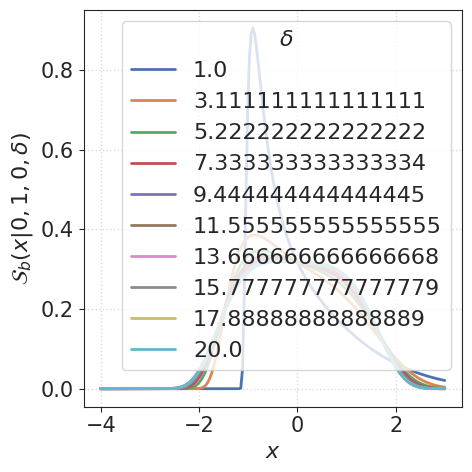

In [34]:
# Make plot of delta
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-4,3,200)
deltas = np.linspace(1, 20, 10)
for i in deltas:
    plt.plot(ran, fb(ran, 0 ,1, 200, i), label=i)
plt.legend(title="$\delta$")
plt.xlabel('$x$')
plt.ylabel('$\mathcal{S}_b(x|0,1,0,\delta )$')
plt.tight_layout()
# Make plot of delta
fig, ax = plt.subplots(1,1,figsize=(5,5))
ran = np.linspace(-4,3,200)
for i in deltas:
    plt.plot(ran, fb(ran, 0 ,1, 10, i), label=i)
plt.legend(title="$\delta$")
plt.xlabel('$x$')
plt.ylabel('$\mathcal{S}_b(x|0,1,0,\delta )$')
plt.tight_layout()

In [35]:
# Make 2d plots of the skew and kurtosis values of a sequence of epsilons and deltas 
n_epsilons = 30
n_deltas = 30
epsilons = np.linspace(5, 0.1,n_epsilons)
deltas = np.linspace(1, 5, n_deltas)
moments = np.zeros((n_epsilons,n_deltas,4))
for ie, ve in enumerate(epsilons):
    for id, vd in enumerate(deltas):
        for i in range(4):
            moments[ie, id, i] = m(ve, vd, i+1)


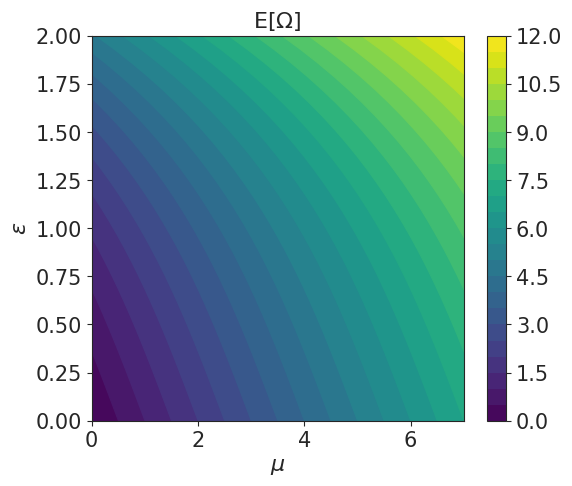

In [38]:
n_mus = 30
n_epsilons = 30
mus = np.linspace(7, 0, n_mus)
epsilons = np.linspace(0, 2, n_epsilons)
means = np.zeros((n_epsilons,n_deltas)) # Make 2d plots of the mean functions of mu and epsilon 
for im, vm in enumerate(mus):
    for ie, ve in enumerate(epsilons):
        means[ie, im] = m(ve, 1, 1) + vm

fig = plt.figure(figsize=(6,5))
plt.tight_layout()

a = plt.contourf(mus, epsilons, means, levels= np.linspace(0,12,25), cmap='viridis')
for c in a.collections:
    c.set_edgecolor("face")
b = plt.colorbar(a)
plt.title("E$[\Omega]$")
plt.xlabel('$\mu$')

plt.ylabel('$\epsilon$')
plt.savefig(imgspath / 'mu_epsilon_correlation.pdf', bbox_inches='tight')

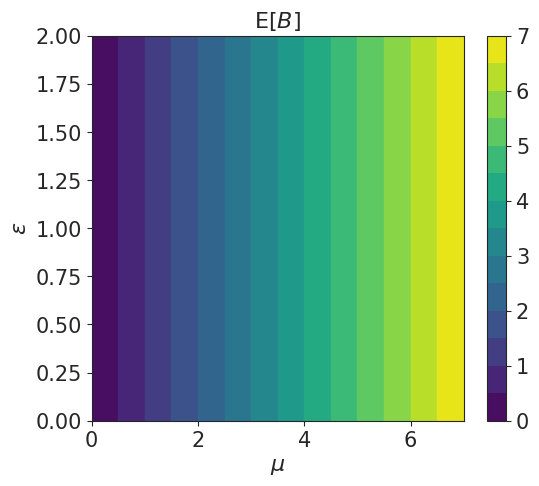

In [93]:
n_mus = 30
n_epsilons = 30
mus = np.linspace(7, 0, n_mus)
epsilons = np.linspace(0, 2, n_epsilons)
means = np.zeros((n_epsilons,n_deltas)) # Make 2d plots of the mean functions of mu and epsilon 
for im, vm in enumerate(mus):
    for ie, ve in enumerate(epsilons):
        means[ie, im] = vm

fig = plt.figure(figsize=(6,5))
plt.tight_layout()

a = plt.contourf(mus, epsilons, means, levels= np.linspace(0,7,15), cmap='viridis')
for c in a.collections:
    c.set_edgecolor("face")
b = plt.colorbar(a)
plt.title("E$[B]$")
plt.xlabel('$\mu$')

plt.ylabel('$\epsilon$')
plt.savefig(imgspath / 'mu_epsilon_correlation_fixed.pdf', bbox_inches='tight')

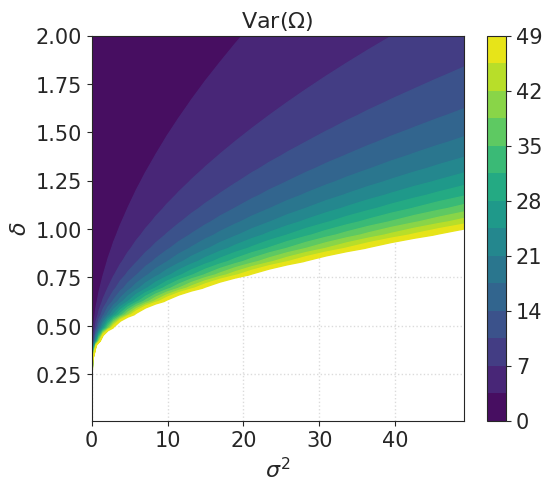

In [94]:
n_sigmas = 30
n_deltas = 30
sigmas2 = np.linspace(7, 0, n_sigmas)**2
deltas = np.linspace(0.01, 2, n_deltas)
vars = np.zeros((n_epsilons,n_deltas)) # Make 2d plots of the mean functions of mu and epsilon 
for isi, vs in enumerate(sigmas2):
    for id, vd in enumerate(deltas):
        vars[id, isi] = m(0, vd, 2) * vs

fig = plt.figure(figsize=(6,5))
plt.tight_layout()

a = plt.contourf(sigmas2, deltas,vars, levels=np.linspace(0,49,15), cmap='viridis')
for c in a.collections:
    c.set_edgecolor("face")
b = plt.colorbar(a)
plt.title("Var$(\Omega)$")
plt.grid(True)
plt.xlabel('$\sigma^2$')
plt.ylabel('$\delta$')
plt.savefig(imgspath / 'sigma_delta_correlation.pdf', bbox_inches='tight')

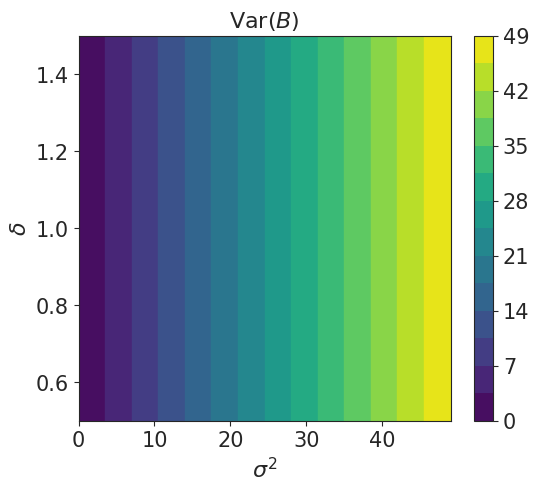

In [95]:
n_sigmas = 30
n_deltas = 30
sigmas2 = np.linspace(7, 0, n_sigmas)**2
deltas = np.linspace(0.5, 1.5, n_deltas)
vars = np.zeros((n_epsilons,n_deltas)) # Make 2d plots of the mean functions of mu and epsilon 
for isi, vs in enumerate(sigmas2):
    for id, vd in enumerate(deltas):
        vars[id, isi] = vs 

fig = plt.figure(figsize=(6,5))
plt.tight_layout()

a = plt.contourf(sigmas2, deltas, vars, levels= np.linspace(0,49,15), cmap='viridis')
for c in a.collections:
    c.set_edgecolor("face")
b = plt.colorbar(a)
plt.title("Var$(B)$")
plt.xlabel('$\sigma^2$')
plt.ylabel('$\delta$')
plt.savefig(imgspath / 'sigma_delta_correlation_fixed.pdf', bbox_inches='tight')